In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
df = pd.read_csv("C:/Users/shreya/Downloads/adult.csv (1)/adult.csv")

## Data Cleaning

In [60]:
df.shape

(32561, 15)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [62]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [63]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [64]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           15
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       42
income                2
dtype: int64

In [65]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

<Axes: >

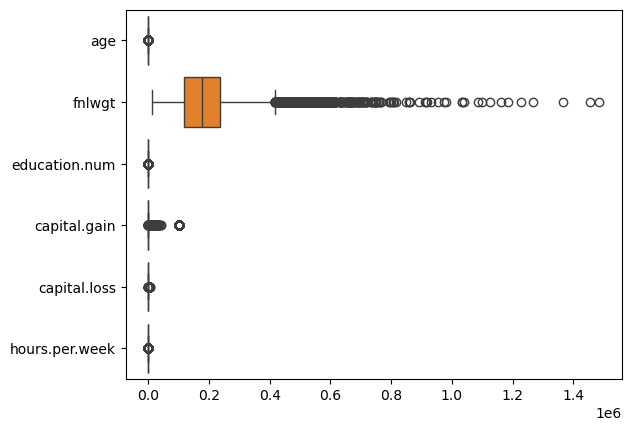

In [66]:
import seaborn as sns
sns.boxplot(df,orient = "h")

In [67]:
#  Removes the 'fnlwgt' column from the dataframe
#  Because 'fnlwgt' is not useful for our analysis or model
df = df.drop(columns=["fnlwgt"])

##### Check & drop duplicates

In [68]:
df.duplicated().sum()


3465

In [69]:
df = df.drop_duplicates()


In [70]:
missing_count = (df['workclass'] == '?').sum()
print(f"Rows with ?: {missing_count}")


Rows with ?: 1632


In [71]:
df.replace('?', np.nan, inplace=True)
# Fills missing values in these categorical columns with the mode
for col in ['workclass', 'occupation', 'native.country']:
    df[col] = df[col].fillna(df[col].mode()[0])

In [72]:
missing_count = (df['workclass'] == '?').sum()
print(f"Rows with ?: {missing_count}")

Rows with ?: 0


In [73]:
df["workclass"].unique()

array(['Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

##### Encode target variable

In [74]:
df["income"] = df["income"].map({"<=50K": 0, ">50K": 1})

## Target variable

In [75]:
X = df.drop("income", axis=1)
y = df["income"]
print(y.shape)
print(X.shape)

(29096,)
(29096, 13)


In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,stratify=y
)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(23276, 13)
(5820, 13)
(23276,)
(5820,)


In [77]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
transformer = ColumnTransformer(transformers = [("cat",OrdinalEncoder( handle_unknown='use_encoded_value',
            unknown_value=-1),[1,2,4,5,6,7,8,12]),
                                ("num",StandardScaler(),[0,3,9,10,11])])
knn_pipe = Pipeline([("preprocessor", transformer),("knn", KNeighborsClassifier())])

In [78]:
knn_pipe.fit(X_train,y_train)

,steps,"[('preprocessor', ...), ('knn', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


## Hyper Parameter Tunning

In [82]:
knn_params = {
    "knn__n_neighbors": range(1, 21),
    "knn__p": [1, 2,3],
    "knn__weights": ["uniform", "distance"]
}

In [83]:
from sklearn.model_selection import GridSearchCV
knn_gs = GridSearchCV(
    estimator=knn_pipe,
    param_grid=knn_params,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)


In [84]:
knn_gs.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


,estimator,Pipeline(step...lassifier())])
,param_grid,"{'knn__n_neighbors': range(1, 21), 'knn__p': [1, 2, ...], 'knn__weights': ['uniform', 'distance']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('cat', ...), ('num', ...)]"


In [85]:
knn_gs.best_params_,knn_gs.best_score_

({'knn__n_neighbors': 18, 'knn__p': 1, 'knn__weights': 'uniform'},
 0.8277196304457757)

In [86]:
## # Pipeline with preprocessing and Decision Tree using the best tuned hyperparameters
from sklearn.neighbors import KNeighborsClassifier
knn_pipe = Pipeline([("preprocessor",transformer),("knn", KNeighborsClassifier(
        n_neighbors=18,
        weights="uniform",     
        p=1                  
        
    ))
])

knn_pipe.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('knn', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


## Evaluate KNN

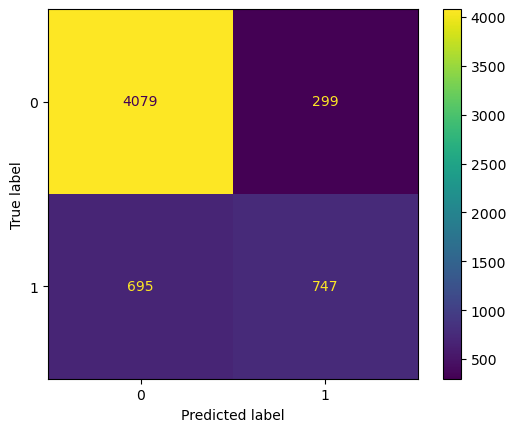

In [90]:
## # Displays the confusion matrix to visualize correct and incorrect predictions
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


## Classification Report

In [88]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Predictions
y_pred = knn_pipe.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test,y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred))
print(classification_report(y_test,y_pred))


Accuracy: 0.8292096219931272
ROC-AUC: 0.7248672437968432
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      4378
           1       0.71      0.52      0.60      1442

    accuracy                           0.83      5820
   macro avg       0.78      0.72      0.75      5820
weighted avg       0.82      0.83      0.82      5820



In [89]:

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

print("Accuracy :", accuracy_score(y_test,y_pred))
print("Precision:", precision_score(y_test,y_pred))
print("Recall   :", recall_score(y_test,y_pred))
print("F1 Score :", f1_score(y_test,y_pred))

Accuracy : 0.8292096219931272
Precision: 0.7141491395793499
Recall   : 0.5180305131761442
F1 Score : 0.6004823151125402


 ## DECISION TREE MODEL 

In [92]:
from sklearn.tree import DecisionTreeClassifier

In [93]:
# # Pipeline combining preprocessing and Decision Tree model
dt_pipe = Pipeline([
    ("preprocessor",transformer),
    ("dt", DecisionTreeClassifier(random_state=42))
])


## Hyperparameter Tunning

In [94]:
## # Hyperparameters to tune the Decision Tree model
dt_params = {
    "dt__max_depth": range(2, 21),
    "dt__min_samples_split": range(2, 11),
    "dt__min_samples_leaf": range(1, 6),
    "dt__criterion": ["gini", "entropy"]
}

## GridSearchCV

In [95]:
dt_gs = GridSearchCV(
    dt_pipe,
    dt_params,
    cv=5,
    scoring="f1",
    n_jobs=-1,
    verbose=1
)

In [96]:
## Fit GridSearch
dt_gs.fit(X_train,y_train)

Fitting 5 folds for each of 1710 candidates, totalling 8550 fits


,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'dt__criterion': ['gini', 'entropy'], 'dt__max_depth': range(2, 21), 'dt__min_samples_leaf': range(1, 6), 'dt__min_samples_split': range(2, 11)}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('cat', ...), ('num', ...)]"


In [97]:
## tuned model
print("Best Parameters:", dt_gs.best_params_)

Best Parameters: {'dt__criterion': 'gini', 'dt__max_depth': 13, 'dt__min_samples_leaf': 4, 'dt__min_samples_split': 10}


In [98]:
best_dt = dt_gs.best_estimator_

In [99]:
# Predict
y_pred = best_dt.predict(X_test)

# Decision Tree with tuned parameters

In [100]:
## # Pipeline with preprocessing and Decision Tree using the best tuned hyperparameters
dt_best_pipe = Pipeline([
    ("preprocessor", transformer),
    ("dt", DecisionTreeClassifier(
        criterion="gini",
        max_depth=13,
        min_samples_split=10,
        min_samples_leaf=4,
        class_weight="balanced",
        random_state=42
    ))
])

In [101]:
# Train
dt_best_pipe.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('dt', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [102]:
# Predict
y_pred_dt = dt_best_pipe.predict(X_test)


In [103]:
## Evaluation Metrics (Accuracy, Precision, Recall, F1)

In [104]:

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

print("Accuracy :", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall   :", recall_score(y_test, y_pred_dt))
print("F1 Score :", f1_score(y_test, y_pred_dt))


Accuracy : 0.7939862542955326
Precision: 0.5554035567715458
Recall   : 0.8446601941747572
F1 Score : 0.6701513067400275


In [105]:
## # Shows how well the model is predicting each class
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4378
           1       0.73      0.57      0.64      1442

    accuracy                           0.84      5820
   macro avg       0.80      0.75      0.77      5820
weighted avg       0.84      0.84      0.84      5820



### Classification Report

In [106]:
## Confusion Matrix

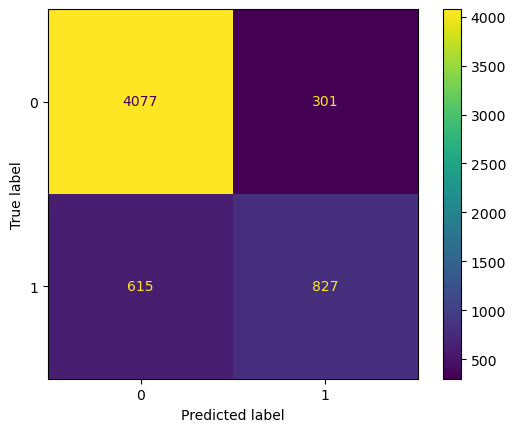

In [107]:
## # Displays the confusion matrix to visualize correct and incorrect predictions
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    best_dt,
    X_test,
    y_test
)


## Final Evaluation

In [108]:
from sklearn.metrics import accuracy_score
print("Best KNN Test Accuracy:",
      accuracy_score(y_test, knn_gs.best_estimator_.predict(X_test)))

print("Best DT Test Accuracy:",
      accuracy_score(y_test, dt_gs.best_estimator_.predict(X_test)))


Best KNN Test Accuracy: 0.8292096219931272
Best DT Test Accuracy: 0.8426116838487973


In [109]:
import joblib

joblib.dump(knn_pipe, "dectree_model.joblib")


['dectree_model.joblib']

In [110]:
import sklearn
import sys

print("Sklearn:", sklearn.__version__)
print("Python:", sys.executable)


Sklearn: 1.7.2
Python: C:\ProgramData\anaconda3\python.exe
